<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Clustering</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Scale Features](#add)
2. [Define Perspectives](#add)
2. [Hierarchical](#add)
2. [K-Means](#add)
2. [Merging Perspectives](#add)
2. [](#add)

# Imports 

In [1]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

import warnings

In [10]:
from os.path import join

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('df2.csv')

In [4]:
df.head()

,customer_id,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,customer_lifecycle_stage,vendor_loyalty_score,peak_order_day,peak_order_hour,cuisine_variety,available_cuisines_city,relative_cuisine_variety,average_spending,order_frequency,chain_consumption
0,1b8f824d5e,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,Active,0.5,DOW_0,HR_18,1,15,0.066667,14.440,2.0,0.5
1,5d272b9dcb,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,Active,0.5,DOW_0,HR_10,2,8,0.250000,9.605,2.0,1.0
2,f6d1b2ba63,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,Active,1.0,DOW_0,HR_9,1,12,0.083333,4.600,2.0,1.0
3,180c632ed8,26.0,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,Active,0.5,DOW_1,HR_11,2,12,0.166667,15.780,1.0,0.5
4,4eb37a6705,20.0,2,5,0,0.0,2,NO PROMO,DIGI,14.57,...,Active,0.5,DOW_1,HR_8,2,12,0.166667,27.720,1.0,0.0


In [5]:
df.columns

Index(['customer_id', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'age_group', 'customer_city', 'total_orders', 'days_since_last_order',
       'customer_lifecycle_stage', 'vendor_loyalty_score', 'peak_order_day',
       'peak_order_hour', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_varie

In [6]:
# split data into metric and non metric
df_non_metric = df.select_dtypes(include=['object'])
df_metric = df.select_dtypes(include=['int64', 'float64'])

In [7]:
df_metric.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'customer_city', 'total_orders', 'days_since_last_order',
       'vendor_loyalty_score', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_variety', 'average_spending', 'order_frequency',
       'chain_consumption'],
      dtype='object')

### Define Perspectives

- Preferences Perspective: vendor_loyalty_score, relative_cuisine_variety, chain_consumption
- Behavioural Perspective: first_order, days_since_last_order, order_frequency, total_orders, total_amount_spent, average_spending

oalsoaodps

In [8]:
# preference features focus more on 
preferences_features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']
# behavioural features focus more on
behavioural_features = ['first_order', 'days_since_last_order', 'order_frequency', 
                        'total_orders', 'total_amount_spent', 'average_spending']

print(df_metric.columns)

In [9]:
df_prf = df[preferences_features].copy()
df_beh = df[behavioural_features].copy()

In [11]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# set up the clusterers
# n_init = 10 and random_state = 20
kmeans = KMeans(
    init='k-means++',
    n_init=10,
    random_state=20
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [12]:
# obtain the R² scores for each cluster solution on preferences variables
r2_scores_prf = {}
r2_scores_prf['kmeans'] = get_r2_scores(df_prf, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_prf[linkage] = get_r2_scores(
        df_prf, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores_prf)

,kmeans,complete,average,single,ward
2,0.446701,0.352085,0.315985,0.315985,0.377407
3,0.687621,0.569194,0.608894,0.608894,0.637686
4,0.830292,0.584102,0.814097,0.663153,0.773555
5,0.878678,0.840911,0.828110,0.663216,0.863973
6,0.911628,0.855655,0.860160,0.663384,0.896514
7,0.933783,0.892766,0.860182,0.663453,0.922862
8,0.945493,0.894002,0.860255,0.663571,0.934796
9,0.954501,0.902806,0.910887,0.663571,0.945834


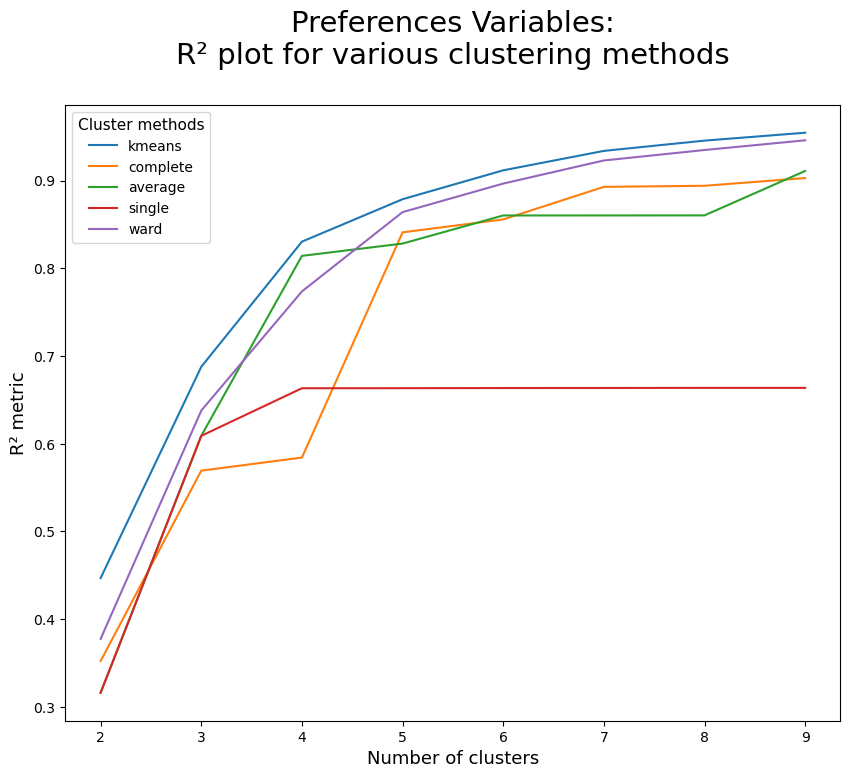

In [13]:
# visualize the R² scores for each cluster solution on preferences variables
pd.DataFrame(r2_scores_prf).plot.line(figsize=(10,8))

plt.title("Preferences Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [14]:
# KMeans clustering algorithm
# grouped into 9 distinct clusters
# selects initial centroids randomly
# run the KMeans algorithm 10 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=9, init='random', n_init=10, random_state=1)

In [15]:
# fit method
kmclust_prf.fit(df[preferences_features])

KMeans(init='random', n_clusters=9, n_init=10, random_state=1)

In [16]:
kmclust_prf.predict(df[preferences_features])

array([7, 2, 5, ..., 8, 5, 5], dtype=int32)

In [17]:
pd.DataFrame(kmclust_prf.transform(df[preferences_features]))

,0,1,2,3,4,5,6,7,8
0,0.411976,0.496830,0.500384,0.564410,0.352097,0.707457,0.620485,0.113036,0.707805
1,0.721271,0.982300,0.100570,0.231418,0.391239,0.525301,0.466675,0.508212,1.128306
2,1.047139,1.133389,0.504420,0.743883,0.815899,0.005603,0.967169,0.724497,1.000109
3,0.356587,0.482707,0.493750,0.544665,0.311383,0.711366,0.562724,0.017814,0.710424
4,0.462471,0.069622,0.993602,1.018231,0.730492,1.120733,0.934803,0.497242,0.504680
...,...,...,...,...,...,...,...,...,...
31504,1.051182,1.135018,0.506881,0.747262,0.819501,0.022269,0.973753,0.726885,1.000494
31505,1.051182,1.135018,0.506881,0.747262,0.819501,0.022269,0.973753,0.726885,1.000494
31506,0.877469,0.572934,1.114160,1.238398,1.019318,1.000016,1.244914,0.720250,0.014761
31507,1.047139,1.133389,0.504420,0.743883,0.815899,0.005603,0.967169,0.724497,1.000109


In [18]:
# KMeans clustering algorithm
# grouped into 8 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust_prf.fit(df[preferences_features])

KMeans(n_init=15, random_state=1)

In [19]:
# cluster range for preferential perspective
range_clusters_prf = range(1, 10)

In [20]:
# empty list to store the inertia values for each number of clusters
inertia_prf = []
for n_clus_prf in range_clusters_prf:  # iterate over desired ncluster range
    kmclust_prf = KMeans(n_clusters=n_clus_prf, init='k-means++', n_init=15, random_state=1)
    kmclust_prf.fit(df[preferences_features])
    inertia_prf.append(kmclust_prf.inertia_) 

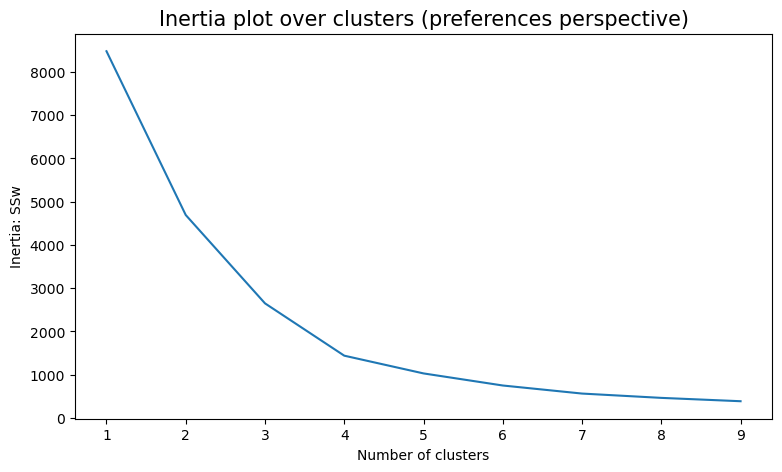

In [21]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_prf, inertia_prf)
ax.set_xticks(range_clusters_prf)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (preferences perspective)", size=15)

plt.show()

In [22]:
warnings.filterwarnings("ignore")

# Compute TSS (Total Sum of Squares)
tss = np.sum((df[preferences_features] - df[preferences_features].mean())**2).sum()

# List to store R² scores for 3, 4, and 5 clusters
r2_scores = []

# Evaluate R² for 3, 4, and 5 clusters
for n_clusters in [3, 4, 5]:
    kmclust_prf = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=1)
    kmclust_prf.fit(df[preferences_features])
    wss_k = kmclust_prf.inertia_  # WSS for the current number of clusters
    r2 = 1 - (wss_k / tss)  # Calculate R²
    r2_scores.append((n_clusters, r2))

# Display the results
for n_clusters, r2 in r2_scores:
    print(f"R² score for {n_clusters} clusters: {r2:.4f}")

R² score for 3 clusters: 0.6876
R² score for 4 clusters: 0.8303
R² score for 5 clusters: 0.8787


In [23]:
# storing average silhouette metric
avg_silhouette_prf = []
# iterate over the desired range of cluster numbers
for nclus_prf in range_clusters_prf:
    # skip n_clusters == 1 since silhouette scores are undefined for one cluster
    if nclus_prf == 1:
        continue

    # initialize the KMeans object with n_clusters value and a random generator
    kmclust_prf = KMeans(n_clusters=nclus_prf, init='k-means++', n_init=15, random_state=1)
    cluster_labels_prf = kmclust_prf.fit_predict(df[preferences_features])

    # the silhouette_score gives the average value for all the samples
    # this gives a perspective into the density and separation of the formed clusters
    silhouette_avg_prf = silhouette_score(df[preferences_features], cluster_labels_prf)
    avg_silhouette_prf.append(silhouette_avg_prf)

    print(f"For n_clusters = {nclus_prf}, the average silhouette_score is : {silhouette_avg_prf}")

For n_clusters = 2, the average silhouette_score is : 0.4299116482013257
For n_clusters = 3, the average silhouette_score is : 0.5287699284144854
For n_clusters = 4, the average silhouette_score is : 0.5766646601057627
For n_clusters = 5, the average silhouette_score is : 0.5566463367373877
For n_clusters = 6, the average silhouette_score is : 0.575733596692114
For n_clusters = 7, the average silhouette_score is : 0.5928341714100998
For n_clusters = 8, the average silhouette_score is : 0.5968993745804452
For n_clusters = 9, the average silhouette_score is : 0.605113777648279


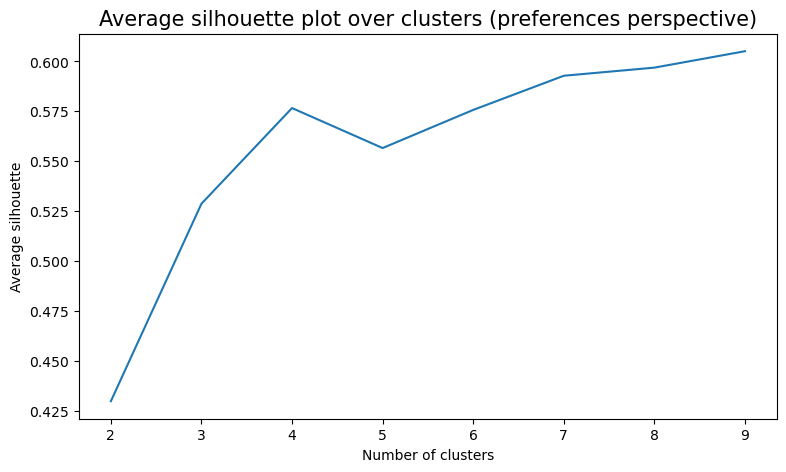

In [24]:
# average silhouette plot for preferential perspective
# inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters_prf[1:], # X-axis; 
         avg_silhouette_prf)     # Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters (preferences perspective)", size=15)
plt.show()

In [25]:
# final cluster solution of the preferential perspective
number_clusters_prf = 5
kmclust_prf = KMeans(n_clusters=number_clusters_prf, init='k-means++', n_init=15, random_state=1)
km_labels_prf = kmclust_prf.fit_predict(df[preferences_features])
km_labels_prf

array([4, 1, 0, ..., 3, 0, 0], dtype=int32)

In [26]:
# characterizing the final clusters of the preferential perspective
df_concat = pd.concat((df[preferences_features], pd.Series(km_labels_prf, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,vendor_loyalty_score,relative_cuisine_variety,chain_consumption
labels,,,
0,1.000000,0.088936,1.000000
1,0.344232,0.221784,0.970813
2,0.364291,0.231789,0.145857
3,1.000000,0.098094,0.000000
4,0.314045,0.279054,0.575165


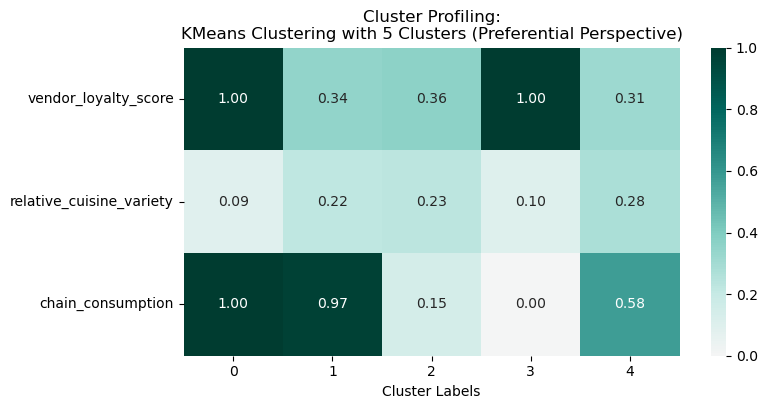

In [27]:
# add the cluster labels to the original data for profiling
df_with_labels_prf = df[preferences_features].copy()
df_with_labels_prf['Cluster Labels'] = km_labels_prf

# compute the cluster profile
km_profile_prf = df_with_labels_prf.groupby('Cluster Labels').mean().T

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(km_profile_prf,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters (Preferential Perspective)")
plt.show()

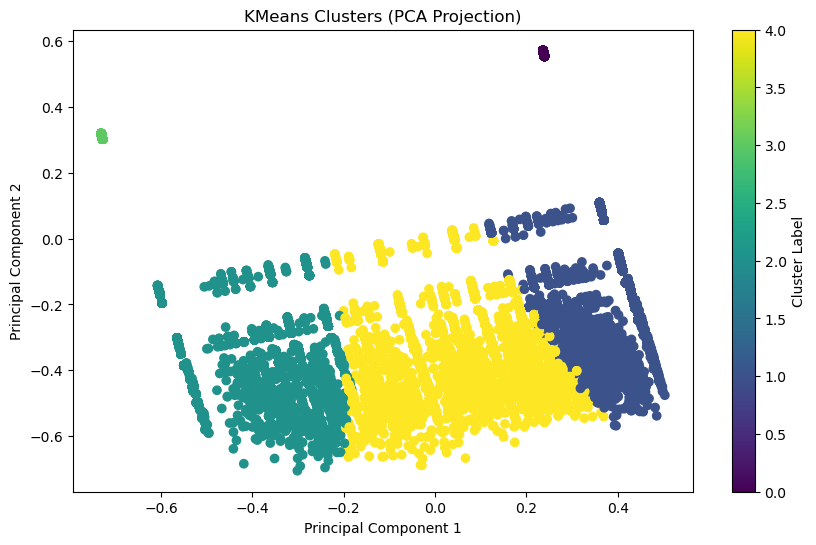

In [28]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[preferences_features])

# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=km_labels_prf, cmap='viridis', marker='o')
plt.title('KMeans Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show a colorbar to indicate cluster colors
plt.colorbar(label='Cluster Label')
plt.show()

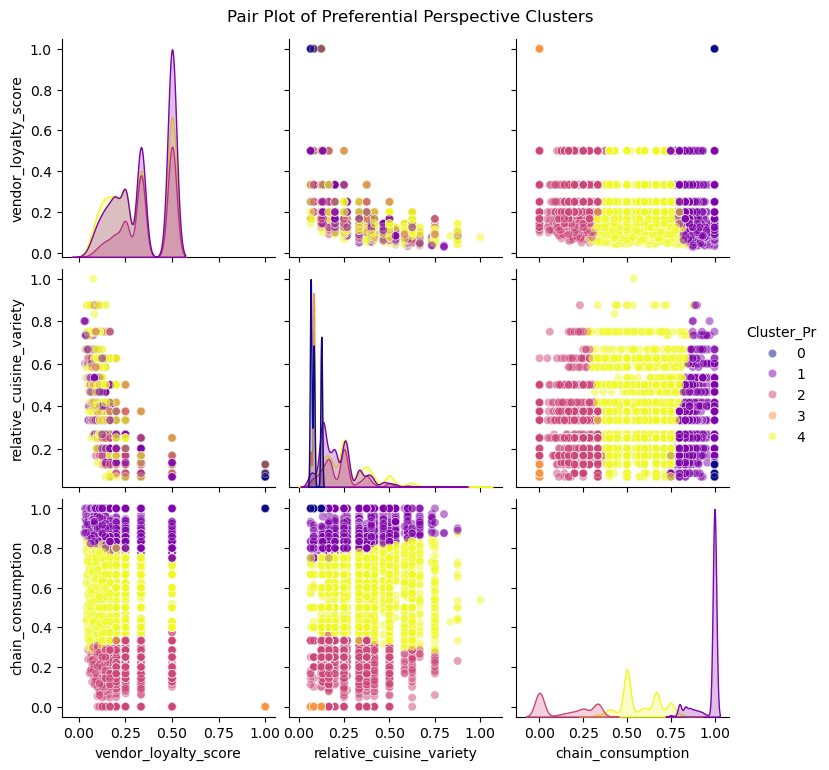

In [29]:
# add the cluster labels to the DataFrame
df['Cluster_Pr'] = km_labels_prf

# select a subset of features for the pair plot, including the cluster label
features_to_plot_prf = preferences_features
features_to_plot_prf.append('Cluster_Pr')

# create a DataFrame for plotting
plot_df_prf = df[features_to_plot_prf]

sns.pairplot(plot_df_prf, hue='Cluster_Pr', palette='plasma', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Preferential Perspective Clusters', y=1.02)
plt.show()

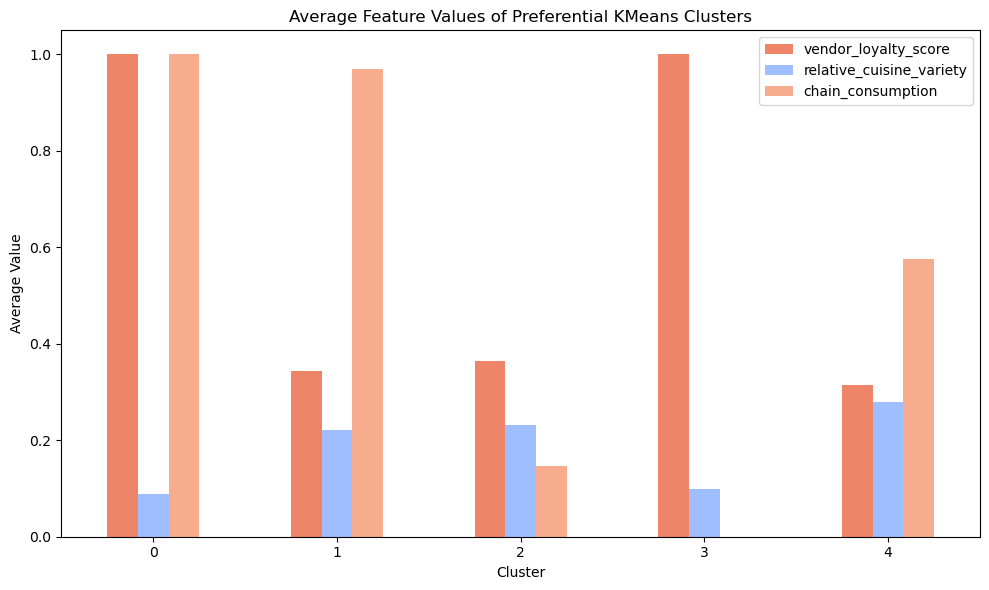

In [30]:
# Add KMeans cluster labels to the DataFrame
df_prf['km_labels_prf'] = km_labels_prf

# Specify the features to plot
preferences_features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# Group by 'km_cluster' and compute the mean
cluster_means = df_prf[preferences_features + ['km_labels_prf']].groupby('km_labels_prf').mean()

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.8)
relative_cuisine_variet_color = cmap(0.3)
chain_consumption_color = cmap(0.7)

colors = [vendor_loyalty_score_color, relative_cuisine_variet_color, chain_consumption_color]

# Plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preferential KMeans Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()